
<div class="alert alert-success"> 
    
Привет! В целом все отлично, большая часть работы сделана. Посмотри, пожалуйста, мои комментарии. Будут вопросы - пиши!
    
</div>

<div class="alert alert-success"> 
    
V2: Все рекомендации учтены, проект и презентация приняты
    
</div>

# Выпускной проект
Банки — Анализ оттока клиентов

# Задача

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

## Заказчик: 
Менеджер продукта по удержанию клиентов

## Цель иследования
Выявить категории клиентов склонных покидать банк для разработки мероприятий по удержанию клиентов

## Описание данных
* userid — идентификатор пользователя,
* score — баллы кредитного скоринга,
* City — город,
* Gender — пол:
 1. М - мужчина
 2. Ж - женщина 
* Age — возраст,
* Objects — количество объектов в собственности,
* Balance — баланс на счёте,
* Products — количество продуктов, которыми пользуется клиент,
* CreditCard — есть ли кредитная карта:
 1. 1 - есть карта
 2. 0 - нет карты
* Loyalty — активный клиент:
 1. 1 - Да
 2. 0 - Нет 
* estimated_salary — заработная плата клиента,
* Churn — ушёл или нет:
 1. 1 - Да
 2. 0 - Нет

## Задачи исследования

### Шаг 1. Откройте файл с данными и изучите общую информацию
* Импортировние библиотек
* Открытие файла с данными
* Изучение общей информации( Типы данных, пропуски, дубликаты)

### Шаг 2. Предобработка данных
* Изучить и обработать пропуски(если это возможно)
* Обработать дубликаты
* Изменить формат столбцов
* Категоризировать данных по возрастным группам.
* Категоризировать данных по кредитному скорингу используя систему расчета Национальноого бюро кредитных историй (НБКИ)
* Категоризировать данных по доходу используя систему расчёта Госстатистики

### Шаг 3. Исследовательский анализ данных
* Изучить количество клиентов покинувших банк
* Изучить корреляции для клиентов банка
* Распределение количества клиентов по городам(с разбивкой по покинувшим банк и оставшимися)
* Определить клиннты какого пола чаще покидают банк
* Провести анализ по возрастным группам для покинувших банк клиентов
* Изучение количества обьектов,продуктов, кредитных карт,активности для клиентов покинувших и оставшихся в банке
* Влияние кредитного скоринга на отток клиентов
* Влияние доходов на отток клиентов

### Шаг 4. Проверка гипотез
* Формулировка гипотез
* Проверка гипотез

### Шаг 5. Выводы
* Общие выводы по проделанным шагам

### Шаг 6. Рекомендации
* Рекомендации по работе с группами риска для снижения уровня оттока клиентов.

### Шаг. 7 Подготовка презентации

https://disk.yandex.ru/i/WxsZ7OA6D1VnKw

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [98]:
!pip install phik

In [99]:
# <импорт библиотек>
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import math
import plotly.graph_objs as go
import plotly.express as px


import phik
from phik.report import plot_correlation_matrix
from phik import report

# <настройки>
pd.set_option('display.max_columns',90000)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 0)

In [100]:
data = pd.read_csv('/datasets/bank_dataset.csv')
data.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [102]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
userid,0.000000
score,0.000000
City,0.000000
Gender,0.000000
Age,0.000000
Objects,0.000000
Balance,36.200000
Products,0.000000
CreditCard,0.000000
Loyalty,0.000000


In [103]:
data['userid'].nunique()

10000

In [104]:
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


### Вывод
* Были импортированы библиотеки и созданы настройки
* Создана переменная с данными для анализа
* Проверен датасет на пропуски, которые располагаются в столбце балланс и составляют 36.2 % необходима дальнейшая работа
* Были проверены userid — идентификатор пользователя все они уникальны, дубликаты не были выявлены
* Выявлены столбцы в которых необходимо изменить данные на bool значения(Наличие кредитной карты, лояльность,ущёл-не ущёл)
* По общим статистическим данным можно сказать:
    1. userid - поле с индефикаторами пользователей, выглядит нормально в нем не может быть аномалий
    2. score - поле данными по скорингу,  выглядит нормально без аномальных значений 
    3. Age - поле возраст, выглядит интересно с максимальным возрастом клиента 92 года
    4. Objects - количество обьектов, среднее и медианое значение отличаются  не сильно, конечно клиент с 10 продуктами выглядит необычно
    5. CreditCard, Loyalty, Churn это столбцы с значениями типа bool, предварительно можем сказать что, кредитные карты есть у 71% клиентов, лояльных клиентов 52% от всего датасета, и 20% датасета покинули банк.
    6. estimated_salary - заработная плата клиента, очень интересный столбец из-за наличия аномально низких значений, заработная плата 12 рублей , т к. банк в России и тако показатель выглядит странно
    7. Balance - балланс карты, есть  высокие показатели и низкие

## Шаг 2. Предобработка данных

### Изменить формат столбцов


In [105]:
data['CreditCard'] = data['CreditCard'].astype(bool)
data['Loyalty'] = data['Loyalty'].astype(bool)
data['Churn'] = data['Churn'].astype(bool)

#### Вывод
Был изменен формат столбцов на Bool значения

### Изучить и обработать пропуски(если это возможно)

In [106]:
# Создаем датасет с пропусками
data_with_null = data.query('Balance.isnull()')
data_with_null.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,True,True,101348.88,True
3,15744090,699,Ярославль,Ж,39,1,NaN,2,False,False,93826.63,False
6,15635267,822,Ярославль,М,50,7,NaN,2,True,True,10062.80,False
11,15779909,497,Рыбинск,М,24,3,NaN,2,True,False,76390.01,False
12,15675000,476,Ярославль,Ж,34,10,NaN,2,True,False,26260.98,False


In [107]:
data_with_null['Churn'].value_counts()

False    3117
True     500 
Name: Churn, dtype: int64

In [108]:
data_with_null.pivot_table(index = ['City','Churn'], values ='CreditCard')

CreditCard
City      Churn            
Рыбинск   False 0.71       
          True  0.70       
Ярославль False 0.72       
          True  0.71

#### Вывод
После ознакомления с пропусками можно сделать несколько предположений:
* В датасете нет в столбце Balance значений равных нулю, и пропуски в значениях могут быть равны 0, но это не точно
* Пропуски в балансе содержатся только в двух городах Ярославль и Рыбинск
* Видим что большая часть людей с Null баллансом является клиентами банка
* Большинство клиентов имеют кредитные карты

Мы не можем заменить значения на 0, так как это исказит дальнейшие данные, можно заменить Null на "Неизвестно", в данном случае предлагаю не трогать данные пропуски и продолжить работу, недостаточно информации для определения причин возникновения пропусков, это могло быть из-за :
 1. Системной ошибки в определенных городах 
 2. Возможно клиенты новые и данные не были подгружены
 3. Баланс клиента равен 0

<div class="alert alert-success"> 

В целом твой подход допустим, согласна, что лучше не заполнять пропуски. Т.к. в столбце баланс действительно нет нулевых значений, то мы можем подумать, что это пропуски, но и сами продукты могут иметь такую спефицику, что баласн всегда ненулевой. 
    
В рамках дизайн-ориентированного подхода к пропущенным данным аналитики, которые имеют доступ к информации о том, как собирались данные, оценивают пропуски на отношение к одной из трёх категорий: 

- **MCAR** (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными.
- **MAR** (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать.
- **MNAR** (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
    
</div>

### Категоризировать данных по возрастным группам.


In [109]:
# Функция для категоризации по возрасту
def categorize_age(income):
    try:
        if 17 <= income <= 24:
            return 'Студенты 17-24'
        elif 25 <= income <= 32:
            return 'Молодые люди 25- 32'
        elif 33 <= income <= 45:
            return 'Взрослые 33 - 45'
        elif 46 <= income <= 55:
            return 'Зрелые 46 - 55'
        elif 56 <= income <= 75:
            return 'Престарелые 56 - 75'
        elif 76 <= income <= 100:
            return 'Старческий 75 +'
    except:
        pass

In [110]:
data['cat_age'] = data['Age'].apply(categorize_age)
data.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn,cat_age
0,15677338,619,Ярославль,Ж,42,2,NaN,1,True,True,101348.88,True,Взрослые 33 - 45
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,False,True,112542.58,False,Взрослые 33 - 45
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,True,False,113931.57,True,Взрослые 33 - 45
3,15744090,699,Ярославль,Ж,39,1,NaN,2,False,False,93826.63,False,Взрослые 33 - 45
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,True,True,79084.10,False,Взрослые 33 - 45


#### Вывод
Был добавлен столбец с возрастной категорией

### Категоризировать данных по кредитному скорингу используя систему расчета Национальноого бюро кредитных историй (НБКИ)

In [111]:
# Функция для категоризации по скорингу
def categorize_score(income):
    try:
        if 0 <= income <= 299:
            return 'критический показатель ПКР и категорический отказ со стороны банков'
        elif 300 <= income <= 599:
            return 'низкий кредитный скоринг'
        elif 600 <= income <= 699:
            return 'среднее значение ПКР'
        elif 700 <= income <= 799:
            return 'Хороший кредитный рейтинг'
        elif 800 <= income <= 1000:
            return 'высокий уровень ПКР'
    except:
        pass

In [112]:
data['cat_score'] = data['score'].apply(categorize_score)
data.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn,cat_age,cat_score
0,15677338,619,Ярославль,Ж,42,2,NaN,1,True,True,101348.88,True,Взрослые 33 - 45,среднее значение ПКР
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,False,True,112542.58,False,Взрослые 33 - 45,среднее значение ПКР
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,True,False,113931.57,True,Взрослые 33 - 45,низкий кредитный скоринг
3,15744090,699,Ярославль,Ж,39,1,NaN,2,False,False,93826.63,False,Взрослые 33 - 45,среднее значение ПКР
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,True,True,79084.10,False,Взрослые 33 - 45,высокий уровень ПКР


#### Вывод
Был добавлен столбец с скоринговой категорией

### Категоризировать данных по доходу используя систему расчёта Госстатистики

In [113]:
# Функция для категоризации по уровню дохода
def categorize_salary(income):
    try:
        if 0 <= income <= 8000:
            return 'Крайне низкие'
        elif 8001 <= income <= 11999:
            return 'Низкие'
        elif 12000 <= income <= 19999:
            return 'Бедные'
        elif 20000 <= income <= 29999:
            return 'Выше бедности'
        elif 30000 <= income <= 59999:
            return 'Средний достаток'
        elif 60000 <= income <= 89999:
            return 'Выше среднего'
        elif 90000 <= income <= 149999:
            return 'Богатые'
        elif 150000 <= income <= 999999:
            return 'Сверхбогатые'
    except:
        pass

In [114]:
data['cat_estimated_salary'] = data['estimated_salary'].apply(categorize_salary)
data.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn,cat_age,cat_score,cat_estimated_salary
0,15677338,619,Ярославль,Ж,42,2,NaN,1,True,True,101348.88,True,Взрослые 33 - 45,среднее значение ПКР,Богатые
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,False,True,112542.58,False,Взрослые 33 - 45,среднее значение ПКР,Богатые
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,True,False,113931.57,True,Взрослые 33 - 45,низкий кредитный скоринг,Богатые
3,15744090,699,Ярославль,Ж,39,1,NaN,2,False,False,93826.63,False,Взрослые 33 - 45,среднее значение ПКР,Богатые
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,True,True,79084.10,False,Взрослые 33 - 45,высокий уровень ПКР,Выше среднего


#### Вывод
Был добавлен столбец с  категорией по уровню дохода.

## Шаг 3. Исследовательский анализ данных

### Изучить количество клиентов покинувших банк по городам


In [115]:
(
    data.pivot_table(index = 'City', values ='Churn', aggfunc = ['sum','count','mean'])
    .sort_values(by =  ('sum', 'Churn'), ascending = False)
)


,sum,count,mean
,Churn,Churn,Churn
City,,,
Ростов Великий,814,2509,0.32
Ярославль,810,5014,0.16
Рыбинск,413,2477,0.17


In [116]:
fig = go.Figure(go.Pie(
    labels=['Остались ' ,'Ушли'],
    values = data['Churn'].value_counts().to_list(), title='Соотношение ушедших к оставшимся'))
fig.update_traces(textposition='inside', textinfo='percent+value+label', pull=[0.05,0])
fig.show()

#### Вывод
В базе представленны данные по трем городам:
* Ростов Великий
* Ярославль
* Рыбинск

Города по количеству клиентов за весь периуд:
 1. Ярославль - 5014
 2. Ростов Великий - 2509
 3. Рыбинск - 2477
 
Отток клиентов по городам:
* Ростов Великий 814 челоек - 32%
* Ярославль	810	человек - 16%
* Рыбинск	413 человек  - 17%

Так же можно заметить, что общее количество покинувших банк клиентав составляет 20.4% - 2037 человек

### Изучить корреляции для клиентов банка

In [117]:
a =  pd.get_dummies (data, columns=['City'], drop_first= False )

In [118]:
phik_overview1 = a.phik_matrix()

interval columns not set, guessing: ['userid', 'score', 'Age', 'Objects', 'Balance', 'Products', 'estimated_salary', 'City_Ростов Великий', 'City_Рыбинск', 'City_Ярославль']


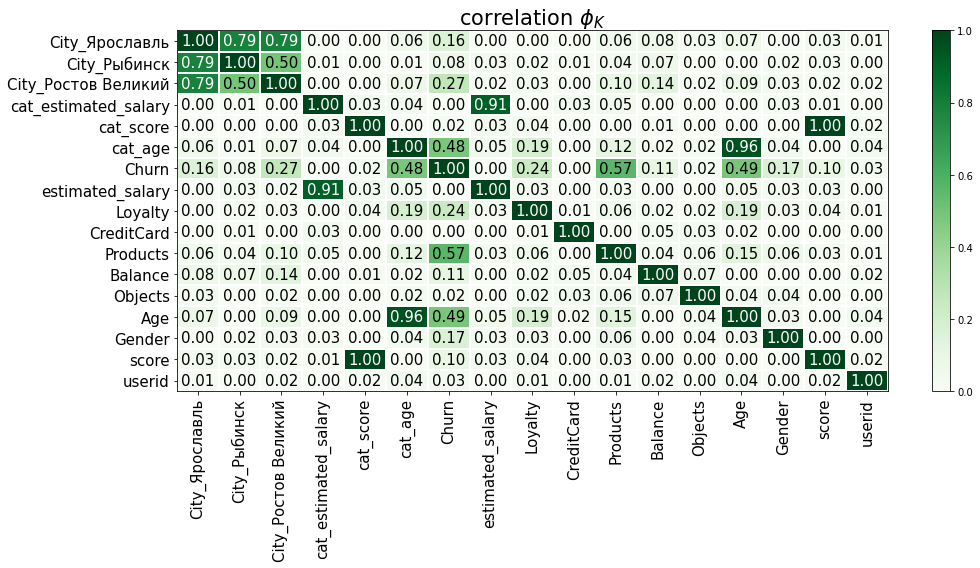

In [119]:
plot_correlation_matrix(phik_overview1.values, 
                        x_labels=phik_overview1.columns, 
                        y_labels=phik_overview1.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 8))
plt.tight_layout()

#### Вывод

Для верного расчета корреляции, был изменен тип кодировки для столбца City методом get_dummies
    
Можем заметить влияние города на отток в последовательности
    
    * Ростов
    * Ярославль
    * Рыбинск
    
Так как целью нашего иследования является анализ групп клиентов склонных к оттоку, нам интересны значения имеющие прямое влеяние на показатель Churn
После постоения кореляции ФИК можно заметить, что ооток клиентом имеет зависимость с:
* Возрастом
* Лояльностью
* Количеством продуктов

<div class="alert alert-success"> 
    
можно еще применить такой же способ кодировки и с переменной Gender. А для характеристики показателей корреляции можно использовать шкалу Чеддока
    
</div>

### Определить клиенты какого пола чаще покидают банк

In [120]:
fig = go.Figure(go.Pie(
    labels=['Мужчин' ,'Девушек'],
    values = data['Gender'].value_counts().to_list(), title='Соотношение мужчин к женщинам по количеству'))
fig.update_traces(textposition='inside', textinfo='percent+value+label', pull=[0.05,0])
fig.show()

In [121]:
data.pivot_table(index = 'Gender',values = 'Churn', aggfunc = ['sum','mean']).reset_index()

,Gender,sum,mean
,,Churn,Churn
0,Ж,1139,0.25
1,М,898,0.16


In [122]:
labels = ['Мужчин','Женщин',]
values = [898, 1139]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, title='Соотношение мужчин к женщинам по количеству покинувших банк')])
fig.update_traces(textposition='inside', textinfo='percent+value+label', pull=[0.01,0])
fig.show()

In [123]:
data.pivot_table(index = ['City','Gender'],values = 'Churn', aggfunc = ['count','sum','mean']).reset_index()

,City,Gender,count,sum,mean
,,,Churn,Churn,Churn
0,Ростов Великий,Ж,1193,448,0.38
1,Ростов Великий,М,1316,366,0.28
2,Рыбинск,Ж,1089,231,0.21
3,Рыбинск,М,1388,182,0.13
4,Ярославль,Ж,2261,460,0.20
5,Ярославль,М,2753,350,0.13


#### Вывод
Общее количество в датасете:
 * Мужчин - 5457 человек
 * Женщин - 4543 человек
 
Банк покинули:
 * Женщин - 1139 - 25% от всех женщин
 * Мужчин - 898 - 16 % от всех мужчин
 
Общие данные по городам:
* Ростов Великий - Женщин - клиентов банка 1193	, покинули 448 = 38% от всех клиентов соответствующего пола в городе
* Ростов Великий - Мужчин - клиентов банка 1316	, покинули 	366	= 28% от всех клиентов соответствующего пола в городе
* Рыбинск - Женщин - клиентов банка 1089, покинули 	231	= 21% от всех клиентов соответствующего пола в городе
* Рыбинск - Мужчин - клиентов банка 1388, покинули 	182	= 13% от всех клиентов соответствующего пола в городе
* Ярославль - Женщин - клиентов банка 2261, покинули 460 = 20% от всех клиентов соответствующего пола в городе
* Ярославль - Мужчин - клиентов банка 2753, покинули 350 = 13% от всех клиентов соответствующего пола в городе

###   Изучение количества обьектов,продуктов, кредитных карт,активности для клиентов покинувших и оставшихся в банке


In [124]:
def table(a,f,data):
    total_top = data.pivot_table(index=a, values=f, aggfunc=['count','mean']).reset_index().sort_values(by =  ('mean', 'Churn'), ascending = False)
    total_top.columns = [a,'Общее_количество','Ушли_%']
    total_top['Количество у оставшихся клиентов'] = (1 -total_top['Ушли_%'])*total_top['Общее_количество']
    total_top['Количество у покинувших клиентов'] = total_top['Общее_количество']* total_top['Ушли_%']
    total_top['Ушли_%'] = total_top['Ушли_%']*100

    return total_top
ar = ['Objects','Products','CreditCard', 'Loyalty']

In [125]:
for i in ar:
    display(table(i,'Churn',data))

,Objects,Общее_количество,Ушли_%,Количество у оставшихся клиентов,Количество у покинувших клиентов
0,0,413,23.00,318.00,95.00
1,1,1035,22.42,803.00,232.00
9,9,984,21.65,771.00,213.00
3,3,1009,21.11,796.00,213.00
5,5,1012,20.65,803.00,209.00
10,10,490,20.61,389.00,101.00
4,4,989,20.53,786.00,203.00
6,6,967,20.27,771.00,196.00
8,8,1025,19.22,828.00,197.00
2,2,1048,19.18,847.00,201.00


,Products,Общее_количество,Ушли_%,Количество у оставшихся клиентов,Количество у покинувших клиентов
3,4,60,100.00,0.00,60.00
2,3,266,82.71,46.00,220.00
0,1,5084,27.71,3675.00,1409.00
1,2,4590,7.58,4242.00,348.00


,CreditCard,Общее_количество,Ушли_%,Количество у оставшихся клиентов,Количество у покинувших клиентов
0,False,2945,20.81,2332.00,613.00
1,True,7055,20.18,5631.00,1424.00


,Loyalty,Общее_количество,Ушли_%,Количество у оставшихся клиентов,Количество у покинувших клиентов
0,False,4849,26.85,3547.00,1302.00
1,True,5151,14.27,4416.00,735.00


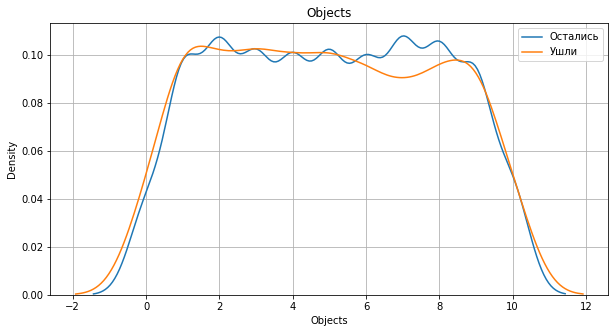

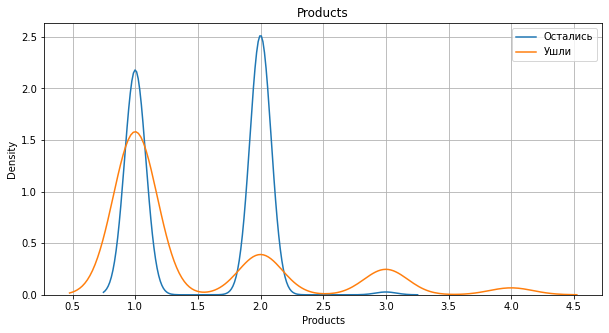

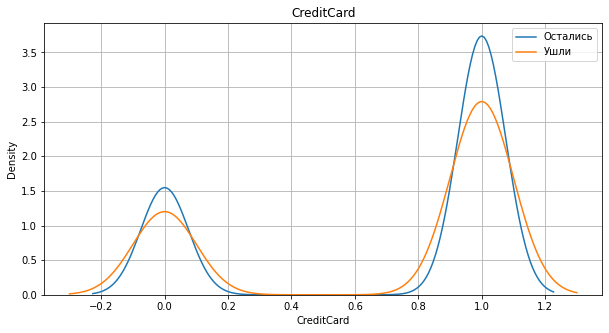

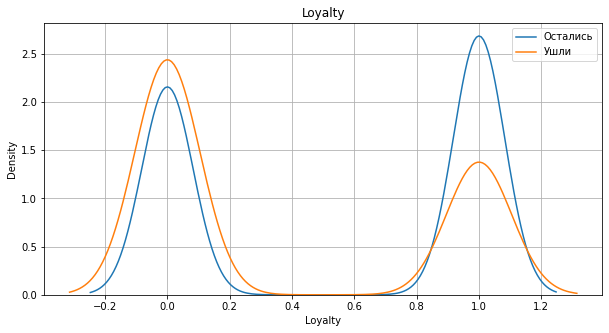

In [126]:
for column in ['Objects', 'Products', 'CreditCard', 'Loyalty']:
    plt.figure(figsize=(10, 5))
    plt.title(column)   
    sns.kdeplot(data.query('Churn==0')[column], label = 'Остались')
    sns.kdeplot(data.query('Churn==1')[column], label = 'Ушли')
    plt.grid(True)
    plt.legend()
    plt.show()

#### Вывод
Среди клиентов покинувших банк по обьектам в собственности преобладают клиенты с:
* С отсутствием обьектов в собственности
* 1 обьектом в собственности
* 9 обьектами в собственности
* 3 обьектами в собственности
* 5 обьектами в собственности

Среди клиентов покинувших банк по количеству продуктов   преобладают клиенты с:
* 4 - используемых продукта 
* 3 - используемых продукта
* 1 - используемый продукт

Без кредитной карты	2945 человек 20.81 % покинули банк,	осталось 2332 клиента, ушло	613
С кредитной кортой 7055 человек, 20.18 % покинули банк,	осталось 5631 клиента, ушло	1424

Чаще всего банк покидают клиенты не совершившие не одной покупки


<div class="alert alert-success"> 
    
Здорово, что используешь kde-plot. Возможно для этих переменных было бы лучше использовать bar plot, где весь столбик 100% и мы на нем отображаем % по оттоку и % оставшихся.
    
Kde plot отлично подойдут для непрерывных переменных, чтобы точнее увидеть отточные интервалы
    
</div>

###  Провести анализ по возрастным группам для покинувших банк клиентов

In [127]:
# группируем данные по возрасту и оттоку и считаем количество
data_ed = data.groupby(['cat_age', 'Churn'], \
                        as_index = False)[['Products']].count()
display(data_ed)
fig = px.bar(data_ed, x="Products", y="cat_age", color="Churn", text="Products")
# формируем заголовок графика и подписи осей средствами matplotlib
# добавляем сетку
fig.update_layout(
    title="График оттока клиентов по возрасту",
    xaxis_title="Количество",
    yaxis_title="Возрастная категория",
    legend_title="Ушёл-True /Остался-False"
)
# отображаем график на экране
fig.show()

,cat_age,Churn,Products
0,Взрослые 33 - 45,False,4232
1,Взрослые 33 - 45,True,867
2,Зрелые 46 - 55,False,648
3,Зрелые 46 - 55,True,663
4,Молодые люди 25- 32,False,2160
5,Молодые люди 25- 32,True,173
6,Престарелые 56 - 75,False,462
7,Престарелые 56 - 75,True,293
8,Старческий 75 +,False,44
9,Старческий 75 +,True,1


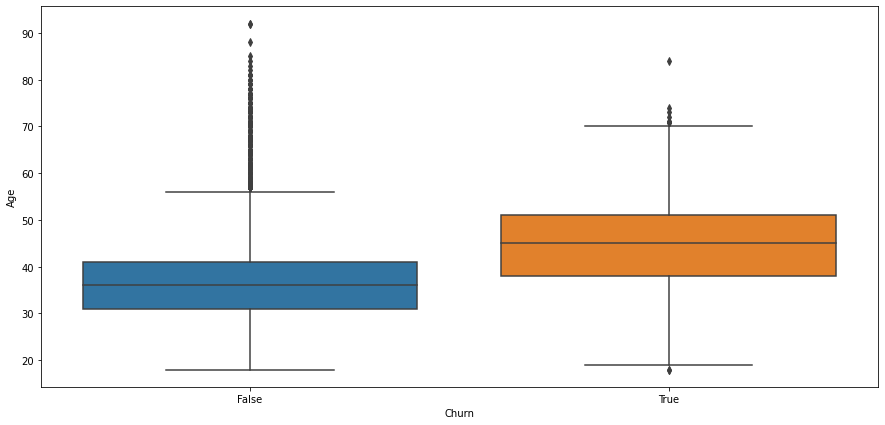

In [128]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(x='Churn', y='Age', data=data) 


#### Вывод по датасету
На графике можно заметить:
* Чаще всего банк покидают возрастные группы от 33 лет до 75 
* Студенты,Молодые люди как и Категория людей 75+ покидают банк реже
* По усатому ящику можно сказать, что отток клиентов старше 70 лет является больше исключением и основная группа клиентов это от 35 - 50

###  Влияние кредитного скоринга на отток клиентов


In [129]:

# группируем данные по возрасту и оттоку и считаем количество
data_ed = data.groupby(['cat_score', 'Churn'], \
                        as_index = False)[['Products']].count()
display(data_ed)
fig = px.bar(data_ed, x="Products", y="cat_score", color="Churn", text="Products")
# формируем заголовок графика и подписи осей средствами matplotlib
# добавляем сетку
fig.update_layout(
    title="График оттока клиентов по скорингу",
    xaxis_title="Количество",
    yaxis_title="Возрастная категория",
    legend_title="Ушёл-True /Остался-False"
)
# отображаем график на экране
fig.show()

,cat_score,Churn,Products
0,Хороший кредитный рейтинг,False,1997
1,Хороший кредитный рейтинг,True,496
2,высокий уровень ПКР,False,527
3,высокий уровень ПКР,True,128
4,низкий кредитный скоринг,False,2374
5,низкий кредитный скоринг,True,660
6,среднее значение ПКР,False,3065
7,среднее значение ПКР,True,753


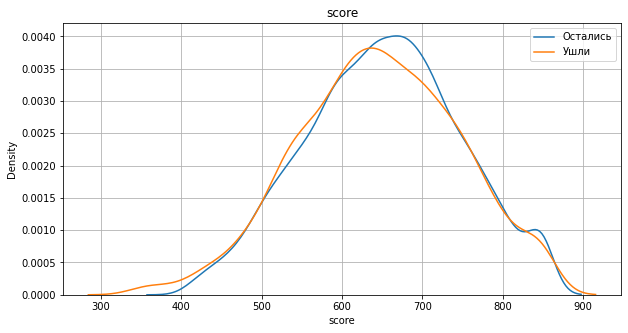

In [130]:
    plt.figure(figsize=(10, 5))
    plt.title('score')   
    sns.kdeplot(data.query('Churn==0')['score'], label = 'Остались')
    sns.kdeplot(data.query('Churn==1')['score'], label = 'Ушли')
    plt.grid(True)
    plt.legend()
    plt.show()

#### Вывод
Отток клиентов наблюдается на всех уровнях кредитного скоринга,кроме высокого уровня, так же можно заметить, что до показателя скоринка в 650 ототок преобладает.

###  Влияние доходов на отток клиентов

In [131]:
# группируем данные по возрасту и оттоку и считаем количество
data_ed = data.groupby(['cat_estimated_salary', 'Churn'], \
                        as_index = False)[['Products']].count()
display(data_ed)
fig = px.bar(data_ed, x="Products", y="cat_estimated_salary", color="Churn", text="Products")
# добавляем сетку
fig.update_layout(
    title="График оттока клиентов по доходу",
    xaxis_title="Количество",
    yaxis_title="Возрастная категория",
    legend_title="Ушёл-True /Остался-False"
)
# отображаем график на экране
fig.show()

,cat_estimated_salary,Churn,Products
0,Бедные,False,304
1,Бедные,True,84
2,Богатые,False,2433
3,Богатые,True,614
4,Выше бедности,False,388
5,Выше бедности,True,104
6,Выше среднего,False,1226
7,Выше среднего,True,311
8,Крайне низкие,False,317
9,Крайне низкие,True,80



<div class="alert alert-success"> 
    
Можно еще посмотреть так:
    
</div>

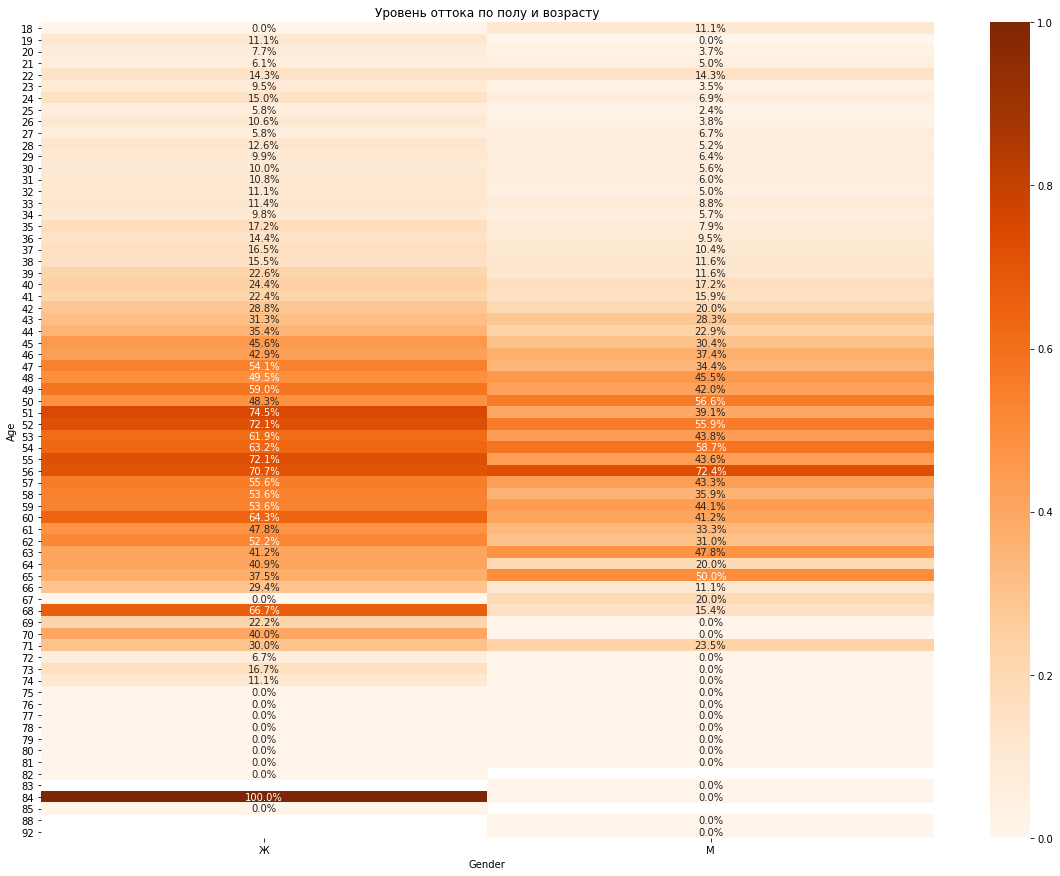

In [132]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.assign(
                age = data.Age.round(-1))\
            .pivot_table(
                index='Age',
                columns='Gender',
                values='Churn',
                aggfunc='mean'), 
            cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по полу и возрасту')
plt.show()

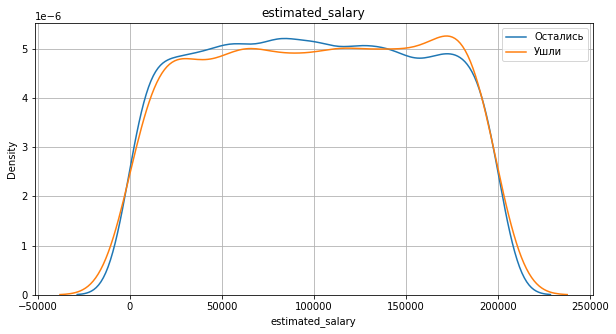

In [133]:
    plt.figure(figsize=(10, 5))
    plt.title('estimated_salary')   
    sns.kdeplot(data.query('Churn==0')['estimated_salary'], label = 'Остались')
    sns.kdeplot(data.query('Churn==1')['estimated_salary'], label = 'Ушли')
    plt.grid(True)
    plt.legend()
    plt.show()

In [134]:
np.percentile(data['estimated_salary'], [5, 50, 95])

array([  9851.8185, 100193.915 , 190155.3755])

In [135]:
len(data.query('estimated_salary<10000'))

508

In [136]:
a = data.query('estimated_salary<10000')
a['cat_score'].value_counts()

среднее значение ПКР         195
низкий кредитный скоринг     164
Хороший кредитный рейтинг    111
высокий уровень ПКР          38 
Name: cat_score, dtype: int64

#### Вывод
Можно заметить очень большой отток людей с категорией дохода:
* Среднего достатка
* Выше среднего
* Богатые
* Сверхбогатые

Также выделяется котегория людей с уровнем дохода менее 10000, так как банк на территории россии исключаем возможность выплат в другой валюте кроме рубля, и данные доходы ниже прожиточного минимума вызывают дополнительные вопросы.

Так же стоит учитывать, что у данных людей присутсвует высокий показатель скоринга, что может наталкивать на возможные проблемы с выгрузкой или занесением информации в базу.


<div class="alert alert-success"> 
    
Выполнен полный и подробный анализ. Можно еще построить графики уровня оттока (countplot)
    
</div>

## Шаг 4. Проверка гипотез

1. Проверка гипотез различия дохода между теми клиентами, которые ушли и теми, которые остались
2. Проверка гипотез различия скорингового показателя между теми клиентами, которые ушли и теми, которые остались

In [137]:
estimated_salary_0 = data.query('Churn == 0')['estimated_salary']
estimated_salary_1 = data.query('Churn == 1')['estimated_salary']
score_0 = data.query('Churn == 0')['score']
score_1 = data.query('Churn == 1')['score']
alpha = 0.05 #  уровень статистической значимости

### Проверка гипотез различия дохода между теми клиентами, которые ушли и теми, которые остались

In [138]:
display('Дисперсия - estimated_salary_0 = ',np.var(estimated_salary_0, ddof=1))
display('Дисперсия - estimated_salary_1 = ',np.var(estimated_salary_1, ddof=1))

'Дисперсия - estimated_salary_0 = '

3295401414.9183965

'Дисперсия - estimated_salary_1 = '

3353848166.8070116

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



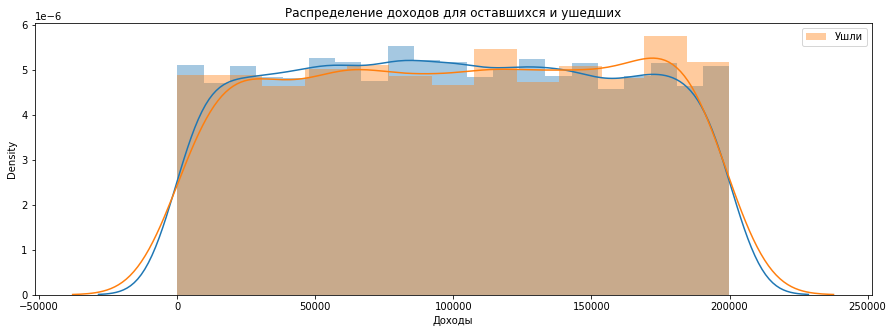

In [139]:
plt.figure(figsize=(15, 5))
sns.distplot(estimated_salary_0)
sns.distplot(estimated_salary_1, label = 'Ушли')

plt.title('Распределение доходов для оставшихся и ушедших')
plt.xlabel('Доходы')

plt.legend()
plt.show()

**Парные выборки из генеральной совокупности не ззависят друг от друга, Дисперсии отличаются необходимо использовать equal_var=False, распределение на графике нормальное**

Приступаем к Т-тесту

H_0 - Средняя заработная плата  между оставшимися и ушедними пользователями не отличается

H_1 - Отвергаем нулевую гипотезу, средняя заработная плата  между оставшимися и ушедними пользователями отличается

In [140]:
results = st.ttest_ind(estimated_salary_0,estimated_salary_1,equal_var=False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22892461305145798
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, средняя заработная плата не отличается

### Гипотеза различия скорингового показателя между теми клиентами, которые ушли и теми, которые остались

In [141]:
display('Дисперсия - score_0 = ',np.var(score_0, ddof=1))
display('Дисперсия - score_1 = ',np.var(score_1, ddof=1))

'Дисперсия - score_0 = '

9149.656541843884

'Дисперсия - score_1 = '

10064.403893876835

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



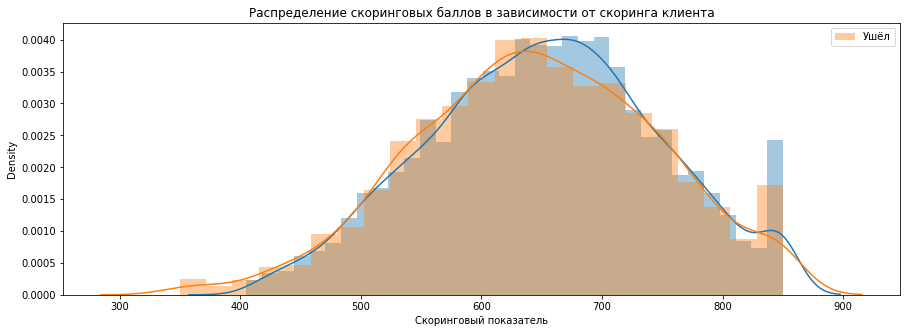

In [142]:
plt.figure(figsize=(15, 5))
sns.distplot(score_0)
sns.distplot(score_1, label = 'Ушёл')

plt.title('Распределение скоринговых баллов в зависимости от скоринга клиента')
plt.xlabel('Скоринговый показатель')
plt.legend()
plt.show()

**Парные выборки из генеральной совокупности не ззависят друг от друга, Дисперсии отличаются необходимо использовать equal_var=False, распределение на графике нормальное**

Приступаем к Т-тесту

H_0 -  Средний скоринговый показатель  между оставшимися и ушедними пользователями не отличается

H_1 - Отвергаем нулевую гипотезу,средний скоринговый показатель  между оставшимися и ушедними пользователями отличается

In [143]:
results = st.ttest_ind(score_0,score_1,equal_var=False)

print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008464728991832862
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу,средний скоринговый показатель  между оставшимися и ушедними пользователями отличается

## Вывод

Был продоставлен датасет содержащий данные по 10000 клиентам «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Клиентами банка являются люди от 18-92 летнего возраста.  В Данных быль выявлены пропуска в баллансе которые содержат 36% от всего датасета, пропуска находятся в Городах Рыбинск и Ярославль, данные пропуска могут означать как нулевые значения и также могут являться системной ошибкой. В столбце с зарплатой были выявлены аномально низкие значения, так как банк Российский для рубля очень малые показатели.Так же не исключена ошибка в заполненных данных

**Информация по городам**

Клиентов в городах: 
* Ярославль 5014 клиентов
* Ростов Великий 2509 клиентов
* Рыбинск 2477 клиентов

Отток клиентов по городам:
* Ростов Великий 814 челоек - 32%
* Ярославль	810	человек - 16%
* Рыбинск	413 человек  - 17%
* Общий отток 20.4% - 2037 человек

**Информация по полу и городу** 

Мужчин 5457 клиннтов, женщин 4543 клиентов. К оттоку более склонные женская часть клиентов.Отток женщин 25% -  мужчин 16 %

* Ростов Великий - Женщин - клиентов банка 1193	, покинули 448 = 38% от всех клиентов соответствующего пола в городе
* Ростов Великий - Мужчин - клиентов банка 1316	, покинули 	366	= 28% от всех клиентов соответствующего пола в городе
* Рыбинск - Женщин - клиентов банка 1089, покинули 	231	= 21% от всех клиентов соответствующего пола в городе
* Рыбинск - Мужчин - клиентов банка 1388, покинули 	182	= 13% от всех клиентов соответствующего пола в городе
* Ярославль - Женщин - клиентов банка 2261, покинули 460 = 20% от всех клиентов соответствующего пола в городе
* Ярославль - Мужчин - клиентов банка 2753, покинули 350 = 13% от всех клиентов соответствующего пола в городе

**Факторы влияющие на оттоки на отток** 

После постоения кореляции ФИК можно заметить, что отток клиентом имеет корреляцию с:
* Возраст
* Лояльность
* Количество продуктов

**Влияние возраста на отток клиентов**

* К оттоку склонны женщины возрастом от 45 -65
* К оттоку склоны мужчины возрастом от 48 - 65
* Можно выделить общую категорию клиентов склонных к оттоку это от 45 до 65 лет

**Лояльность клиента и ооток**

* Клиенты проявившие лояльность имеют процент оттока 14%
* Клиенты непроявившие лояльность имеют процент оттока 27%

**Количество продуктов и отток**  

* Клиенты с 4 продуктами обладают 100% оттоком, нельзя сказать что 4 продукта всегда сопровождается высоким оттоком, слишком малый обьем данных для анализа
* Клиенты с 3 продуктами обладают 82% оттоком, что является большим показателям
* Клиенты с 1 и 2 продуктами преобладают по количестве над клиентами с 3 и 4 продуктами, имеют меньший процент оттока на большие клиентские потери

**Обьекты и отток**
* Клиенты с количеством обьектов в собственности 0 и 1 обладают наивысшим уровнем оттока

**Кредитные карты и ооток**
* Клиенты с кредитными картами - 7055 человек с уровнем оттока 20%
* Клиенты с без кредитки  - 2945 человек с уровнем оттока 21%

**Доход клиентов и отток**  
* Банк часто покидают клиенты с уровнем дохода 100000+
    
**Портрет пользователей в оттоке:**
    
* Средний скоринговый показатель 645
* Средний возраст 45 лет
* Имеют в среднем от 4-5 обьектов
* Средний балланс на карте 120000
* Чаще используют от 1 до 2 продуктов
* 70 % имеют кредитную карту, 30 процентов без кредитной карты
* Часто не проявляют показатель лояльности
* Средняя зарплата 100 000
    
**Портрет клитента оставшегося:**
    
* Средний скоринговый показатель 650
* Средний возраст 37 лет
* Имеют в среднем 5 обьектов
* Средний балланс на карте 120000
* Чаще используют от 1 до 2 продуктов
* 71 % имеют кредитную карту, 29 процентов без кредитной карты
* Чаще лояльны и савершают покупки
* Средняя зарплата 100 000
</div>

## Рекомендации

После подветения итогов по работе с данными можно дать рекомендации:
1. Выяснить причины пропусков в балансе для городов Рыбинск и Ярославль, исправление ошибок с отображением дохода(Проверить корректность выгруженных данных)
2. Провести аудит работы банка(отделений и самих карт)  в Ростов Великий связанный с наибольшим процентом оттока клиентов
3. Введении системы мотивации для клиента совершить покупки(кэшбэк, скидки на категории)
4. Большой процент оттока для клиентов с 0 и 1 обьектом в собственности, необходимо провести мероприятия мотивирующие клиентов брать новые обьектым в собственность, возможно условия для приобретения  сейчас очень не интересные для клинтов,в таком случае необходимо изучить предложения банков-конкурентов и внедрить у себя аналогичные/похожие, которые могли бы удержать клиента. (это относится как к квартирам, машинам,домам,гаражам и др)
6. Не считая что люди с категорией дохода "Бедные" имеют наивысший процент оттока, повышения процента удержания необходимо в первую очередь для групп с категорией дохода Богатые и сверхбогатые, так как они составляют большее количество от датасета примерно 5500 челоек.
9. Выделить интересы возрастной категории 45-65 лет на товары и услуги, внести выгодные условия для преобретения этих продуктов(Повышение льготного периода для карт)
10.Провести дополнительные мероприятия по удержанию женской части клиентов(СкидкиБ акции, партнерские программы,кэшбеки на косметику/салоны красоты)
11. Изучение/внедрение заполняемого бланка при уходе из банка с опросником о причине ухода

## Презентация

https://disk.yandex.ru/i/F_2YSB54Qbw1Iw


<div class="alert alert-danger"> 
    
<s>.На слайдах 8 и 11 лучше заменить kde plot на столбиковые диаграммы. Такой вид диаграммы будет сложно интерпретировать заказчику.
    
Также после внесения небольших правок в рекомендации, этот слайд также можно обновить </s>
    
Презентация принята, только лучше на предпоследнем слайде, где отток по возрасту и полу, построить табличку по категоризированному столбцу с возрастом. Я показала для примера, но в презентации лучше будет смотреться более компактная табличка
    
</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>

Выполнил
    
    

</div>